# PROYECTO RECONOCIMIENTO DE PLACAS PARA FOTO MULTAS
### PARTE I

_______________________________________________________________________________________________________________________

### INTEGRANTES

Luis Carlos Jordan Hurtado

Kelly Fernanda Vasquez Zapata

Jhonattan Leandro Bedoya Mejia

_______________________________________________________________________________________________________________________

### INTRODUCCIÓN

El sistema de reconocimiento automático de matrículas también llamado sistema ANPR (Automatic number plate recognition en inglés) es una tecnología que permite la vigilancia en masa a través del uso de un software de reconocimiento óptico de
caracteres para escanear imágenes y leer las matrículas de los vehículos.

Los actuales sistemas de ANPR pueden escanear matrículas con un rango de distancias de captura de entre 5 y 50 metros según el modelo de cámara, que pueden registrar imágenes de matrículas de vehículos que circulan a velocidades considerables.

Estos sistemas se basan principalmente en el uso de componentes de hardware y software.

_______________________________________________________________________________________________________________________

### RESUMEN

Este programa tiene como fin el reconocimiento de caracteres  mediante la lectura  de imagenes que en nuestro caso son placas de vehiculos.


#### PASO 1:
El procedimiento empieza con el entrenamiento mediante el cual es realizado a partir de la captura o reconocimiento 
de caracteres que se encuentra en la imagen predeterminada, la captura se realiza mediante el teclado del equipo utilizado.

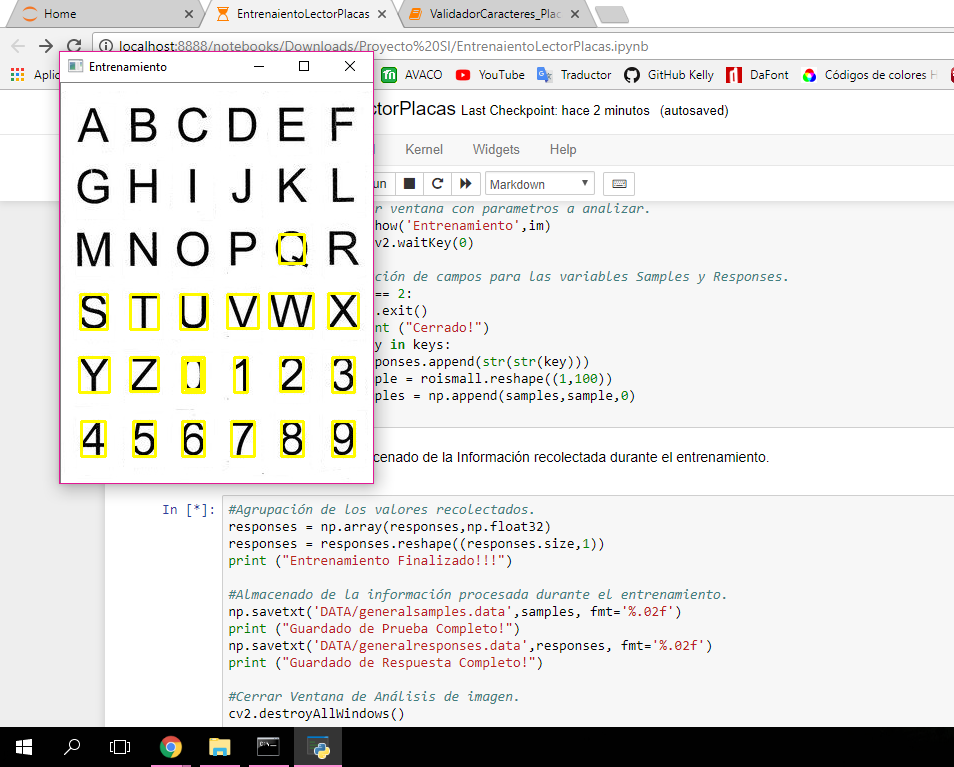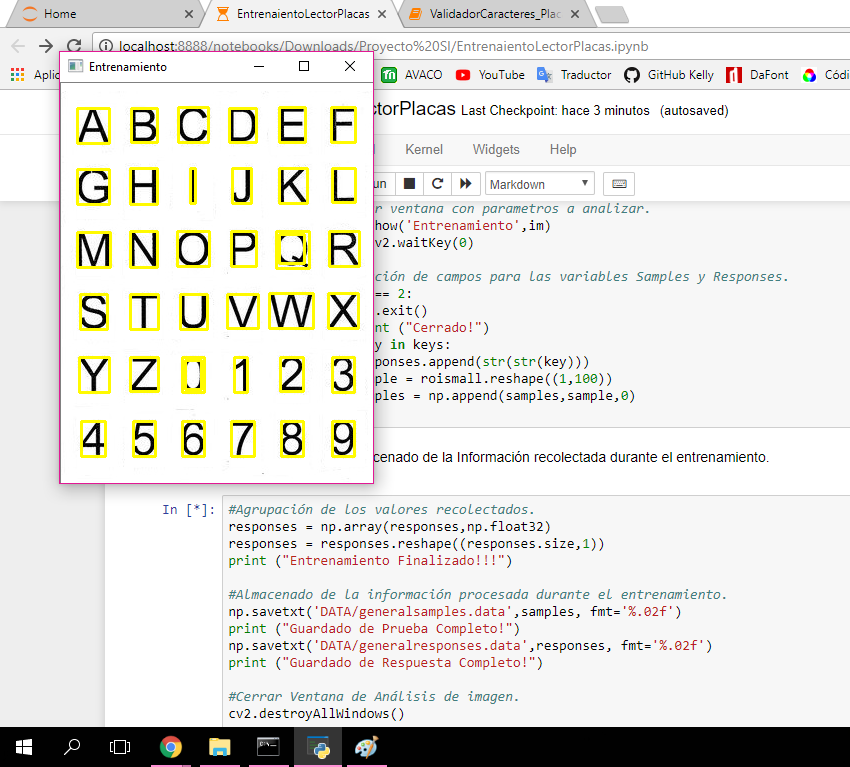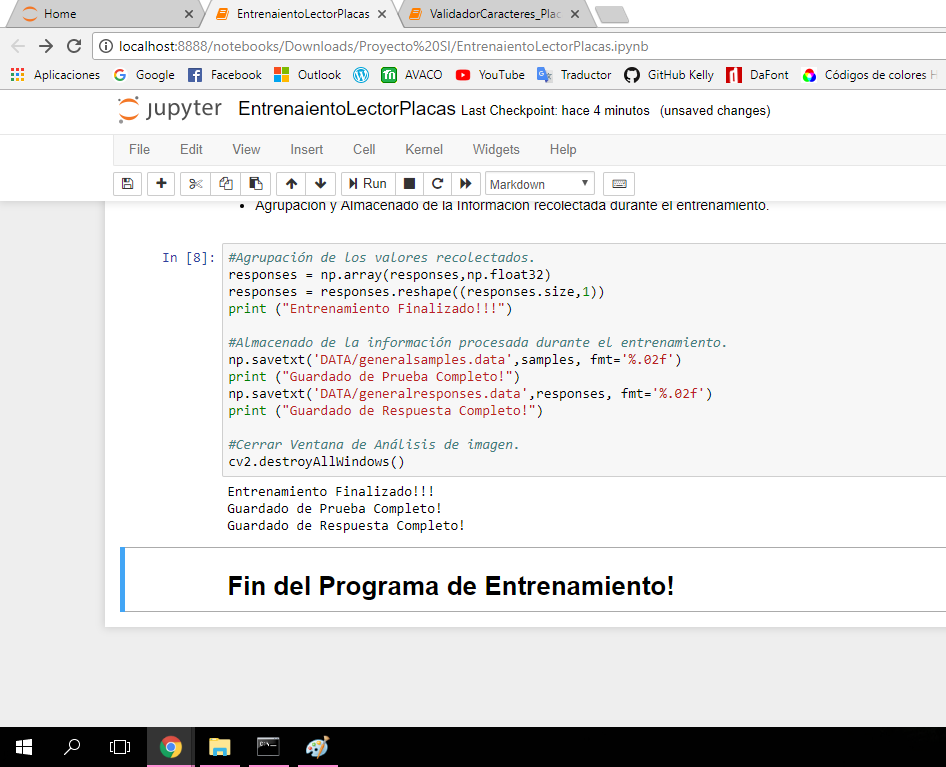

#### PASO 2:
Luego de ello el programa pasa por unos procedimientos o validaciones en lo que va deglozando la imagen a verificar por una escala de grises, a partir de ello nos aparece una ventana la cual nos muestre el enmallado, escala de grises, la imagen de la placa y por ultimo una ventana que nos traduce la placa o imagen que se cargo en un inicio.

*Placas de prueba:

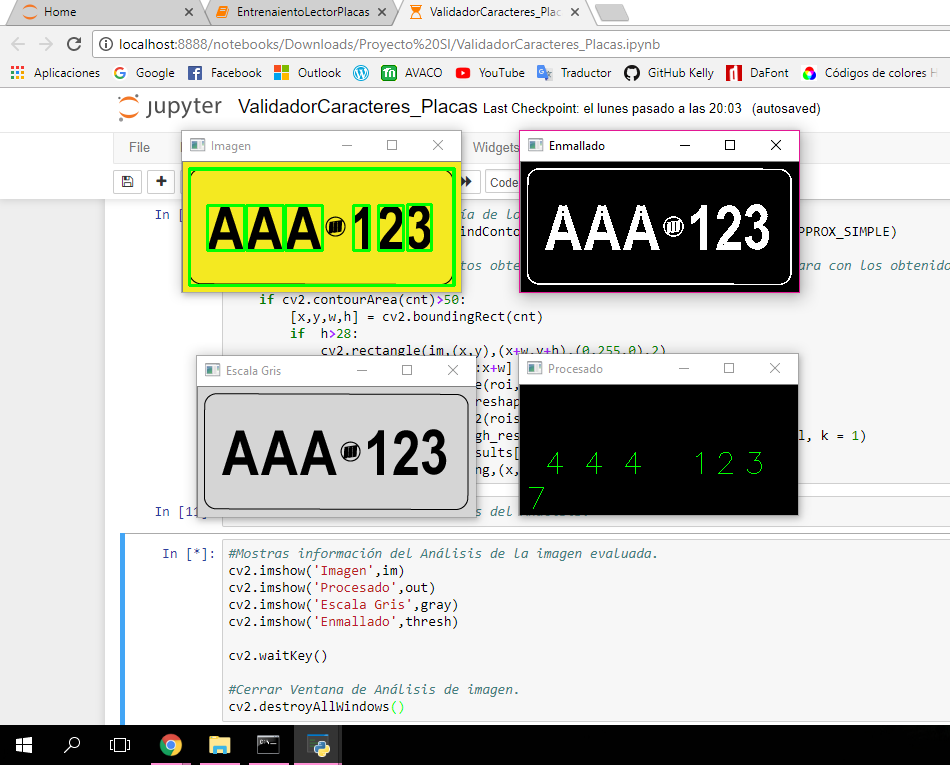
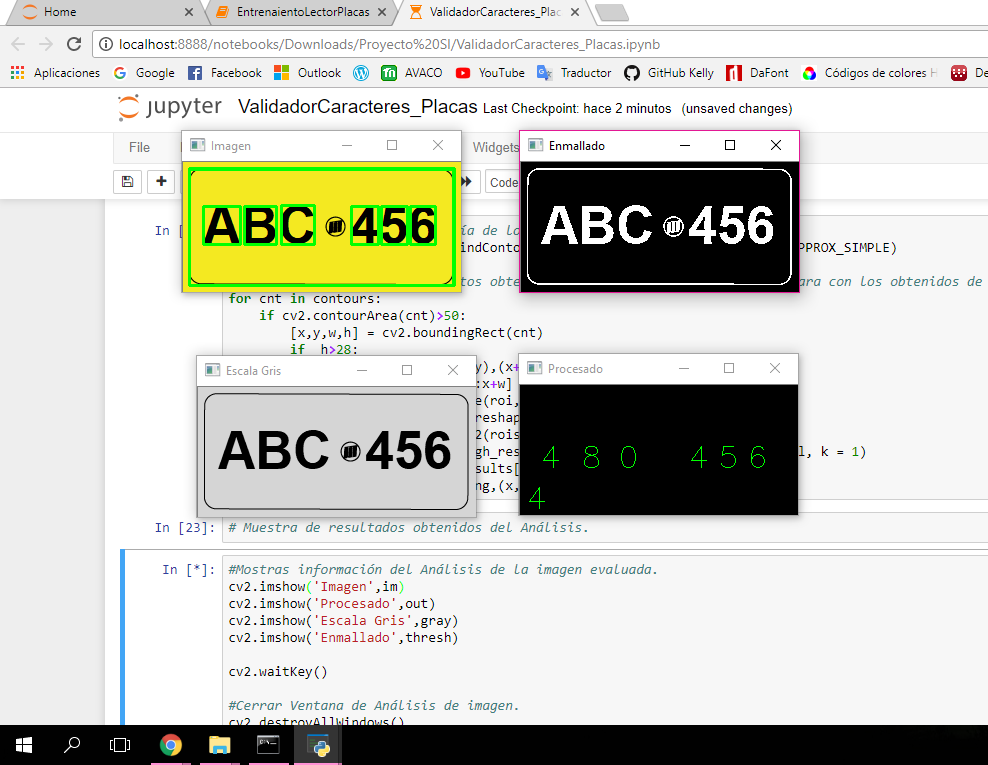


*Placa real:

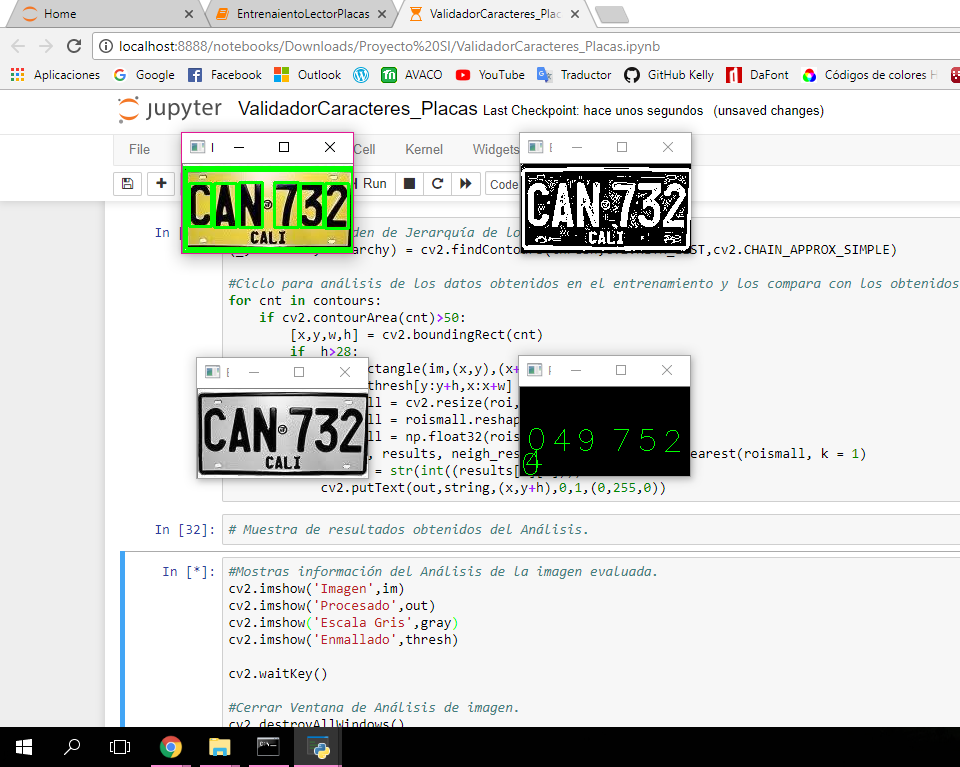


*Resultado final

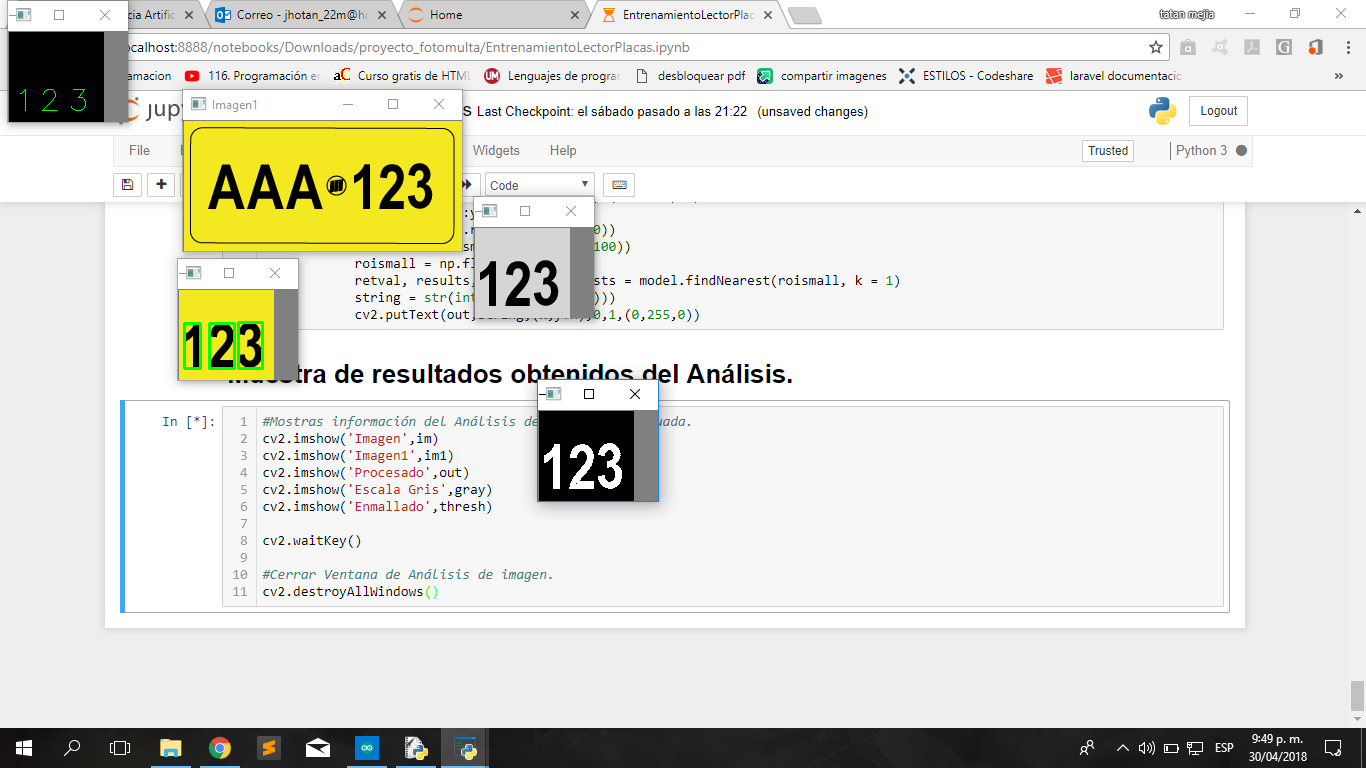

_______________________________________________________________________________________________________________________

### BIBLIOGRAFÍA

www.youtube.com

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_tutorials.html

## ENTRENAMIENTO DE LOS CARACTERES.

- Importación de librerías, imagen a procesar y conversión del elementos a procesar (escala de grises, Blur y Guías).

In [1]:
#Importación de Librerías.
import sys
import numpy as np
import cv2

#Importar imagen para procesar.
im = cv2.imread('ALFABETO/alf3.jpg')
im3 = im.copy()

#Procesado de imágenes.
gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY) #Convertir a escala de grises
blur = cv2.GaussianBlur(gray,(5,5),0) #Filtro
thresh = cv2.adaptiveThreshold(blur,255,1,1,11,2) #clasificar los valores de píxel

- Búsqueda de Contornos en las imágenes ya procesadas y declaracion de variales de registro de los datos procesados.

In [2]:
# Contornos y Orden de Jerarquía de los contornos.
(_, contours, hierarchy) = cv2.findContours (thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

# Declaración de las variables Samples y Respondes las cuales van a manejar los parámetros de las letras para el programa.
samples =  np.empty((0,100))
responses = []

- Ciclo de análisis de la imagen a procesar.

In [3]:
#Ciclo para análisis de los contornos.
keys = [i for i in range(48,58)]
for cnt in contours:
    if cv2.contourArea(cnt)>50:
        [x,y,w,h] = cv2.boundingRect(cnt)

        if  h>28:
            cv2.rectangle(im,(x,y),(x+w,y+h),(0,250,255),2)
            roi = thresh[y:y+h,x:x+w]
            roismall = cv2.resize(roi,(10,10))
            #Mostrar ventana con parametros a analizar.
            cv2.imshow('Entrenamiento',im)
            key = cv2.waitKey(0)
            
            #Validación de campos para las variables Samples y Responses.
            if key == 2:
                sys.exit()
                print ("Cerrado!")
            elif key in keys:
                responses.append(int(chr(key)))
                sample = roismall.reshape((1,100))
                samples = np.append(samples,sample,0)
                

- Agrupación y Almacenado de la Información recolectada durante el entrenamiento.

In [4]:
#Agrupación de los valores recolectados.
responses = np.array(responses,np.float32)
responses = responses.reshape((responses.size,1))
print ("Entrenamiento Finalizado!!!")

#Almacenado de la información procesada durante el entrenamiento.
np.savetxt('DATA/generalsamples.data',samples, fmt='%.02f')
print ("Guardado de Prueba Completo!")
np.savetxt('DATA/generalresponses.data',responses, fmt='%.02f')
print ("Guardado de Respuesta Completo!")

#Cerrar Ventana de Análisis de imagen.
cv2.destroyAllWindows()

Entrenamiento Finalizado!!!
Guardado de Prueba Completo!
Guardado de Respuesta Completo!


### Fin del Programa de Entrenamiento!

### PARTE II

_______________________________________________________________________________________________________________________


## VALIDADOR DE LOS CARACTERES EN LAS PLACAS

- Improtación de datos y conversión para Phyton.

In [5]:
#Importado de Datos del Entranamiento
samples = np.loadtxt('DATA/generalsamples.data',np.float32)
responses = np.loadtxt('DATA/generalresponses.data',np.float32)
responses = responses.reshape((responses.size,1))

#Conversión a modelado Scalar para Phyton.
model = cv2.ml.KNearest_create ()
model.train(samples, cv2.ml.ROW_SAMPLE, responses)

True

- Captura de imagen y conversión a escala de grises y guías.

In [6]:
#Importar imagen a procesar.
#im = cv2.imread('PLACAS/carro (10).jpg')
im = cv2.imread('PLACAS/placa6.png')
im1 = cv2.imread('PLACAS/placa6.png')

num = im [ 10 : 100 , 165 : 260 ] 

im = num


out = np.zeros(im.shape,np.uint8)

#Conversion de la imagen a escala de grises y obtencíon de guías para su analisis y comparación.
gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
thresh = cv2.adaptiveThreshold(gray,255,1,1,11,2)

- Proceso de Analisis de la imagen para reconocer los caracteres.

In [7]:
# Contornos y Orden de Jerarquía de los contornos.
(_,contours,hierarchy) = cv2.findContours(thresh,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

#Ciclo para análisis de los datos obtenidos en el entrenamiento y los compara con los obtenidos de la imagen a evaluar. 
for cnt in contours:
    if cv2.contourArea(cnt)>50:
        [x,y,w,h] = cv2.boundingRect(cnt)
        if  h>28:
            cv2.rectangle(im,(x,y),(x+w,y+h),(0,255,0),2)
            roi = thresh[y:y+h,x:x+w]
            roismall = cv2.resize(roi,(10,10))
            roismall = roismall.reshape((1,100))
            roismall = np.float32(roismall)
            retval, results, neigh_resp, dists = model.findNearest(roismall, k = 1)
            string = str(int((results[0][0])))
            cv2.putText(out,string,(x,y+h),0,1,(0,255,0))

# Muestra de resultados obtenidos del Análisis.

In [8]:
#Mostras información del Análisis de la imagen evaluada.
cv2.imshow('Imagen',im)
cv2.imshow('Imagen1',im1)
cv2.imshow('Procesado',out)
cv2.imshow('Escala Gris',gray)
cv2.imshow('Enmallado',thresh)

cv2.waitKey()

#Cerrar Ventana de Análisis de imagen.
cv2.destroyAllWindows()